# Daily Challenge - Statistics for Machine Learning

# Applying Inferential Statistics

### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [5]:
## TODO : load the csv file from this link : https://www.kaggle.com/code/vaibhagarwal/inferential-statistics/input
## file_1 =
df = pd.read_csv('Churn_Modelling.csv')

# –ü—Ä–æ—Å–º–æ—Ç—Ä –ø–µ—Ä–≤—ã—Ö —Å—Ç—Ä–æ–∫
df.head()
print(df.shape)
df.info()

(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
## TODO : make into a dataframe called df
## df =

In [ ]:
## TODO : output the first 5 lines


In [6]:
## TODO : Create two separate DataFrames, `df_0` and `df_1`, to filter customers who have not exited (0) and customers who have exited (1), respectively
df_0 = df[df['Exited'] == 0]

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è: —É—à–ª–∏
df_1 = df[df['Exited'] == 1]

# –ü—Ä–æ–≤–µ—Ä–∏–º —Ä–∞–∑–º–µ—Ä—ã
print(f"–ö–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –æ—Å—Ç–∞–ª–∏—Å—å: {df_0.shape}")
print(f"–ö–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ —É—à–ª–∏: {df_1.shape}")


–ö–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –æ—Å—Ç–∞–ª–∏—Å—å: (7963, 14)
–ö–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ —É—à–ª–∏: (2037, 14)


## Hypothesis 1: Age

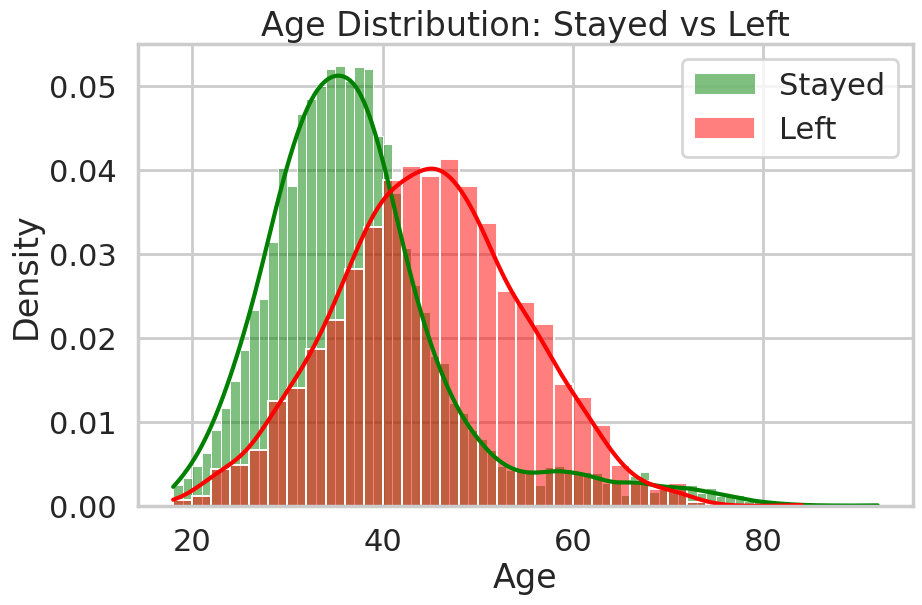

In [7]:
## TODO: Plot the age distribution for customers who stayed with the bank and those who left using seaborn, with different colors for each group and a legend.
plt.figure(figsize=(10, 6))

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –¥–ª—è —Ç–µ—Ö, –∫—Ç–æ –æ—Å—Ç–∞–ª—Å—è
sns.histplot(df_0['Age'], color='green', label='Stayed', kde=True, stat="density")

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –¥–ª—è —Ç–µ—Ö, –∫—Ç–æ —É—à—ë–ª
sns.histplot(df_1['Age'], color='red', label='Left', kde=True, stat="density")

plt.title('Age Distribution: Stayed vs Left')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [8]:
## TODO: Calculate the mean and standard deviation of the age for customers who stayed with the bank.
mean_age_stayed = df_0['Age'].mean()
std_age_stayed = df_0['Age'].std()

print(f"–°—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç (–æ—Å—Ç–∞–ª–∏—Å—å): {mean_age_stayed:.2f}")
print(f"–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ (–æ—Å—Ç–∞–ª–∏—Å—å): {std_age_stayed:.2f}")


–°—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç (–æ—Å—Ç–∞–ª–∏—Å—å): 37.41
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ (–æ—Å—Ç–∞–ª–∏—Å—å): 10.13


In [9]:
## TODO: Calculate the mean and standard deviation of the age for customers who left the bank.
mean_age_left = df_1['Age'].mean()
std_age_left = df_1['Age'].std()

print(f"–°—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç (—É—à–ª–∏): {mean_age_left:.2f}")
print(f"–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ (—É—à–ª–∏): {std_age_left:.2f}")


–°—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç (—É—à–ª–∏): 44.84
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ (—É—à–ª–∏): 9.76


In [11]:
## TODO: Perform a t-test to compare the ages of customers who stayed and left the bank.
from scipy.stats import ttest_ind
# –î–≤–µ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–µ –≤—ã–±–æ—Ä–∫–∏
t_stat, p_value = ttest_ind(df_0['Age'], df_1['Age'], equal_var=False)  # Welch's t-test

print(f"T-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {t_stat:.4f}")
print(f"P-–∑–Ω–∞—á–µ–Ω–∏–µ: {p_value:.4f}")

if p_value < 0.05:
    print("–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –∑–Ω–∞—á–∏–º–∞ –Ω–∞ —É—Ä–æ–≤–Ω–µ 5% ‚Äî –≤–æ–∑—Ä–∞—Å—Ç –≤–ª–∏—è–µ—Ç –Ω–∞ churn.")
else:
    print("–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –ù–ï –∑–Ω–∞—á–∏–º–∞ –Ω–∞ —É—Ä–æ–≤–Ω–µ 5% ‚Äî –≤–æ–∑—Ä–∞—Å—Ç –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ churn.")

T-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: -30.4192
P-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.0000
–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –∑–Ω–∞—á–∏–º–∞ –Ω–∞ —É—Ä–æ–≤–Ω–µ 5% ‚Äî –≤–æ–∑—Ä–∞—Å—Ç –≤–ª–∏—è–µ—Ç –Ω–∞ churn.


Age has a statistically significant effect on churn.

Older customers are more likely to churn.

### Using Bootstrapping

In [12]:
## TODO: Write a function to perform bootstrap sampling and calculate the statistic of interest.
def bs_choice(data, func, size):
    bs_s = np.empty(size)  # –º–∞—Å—Å–∏–≤ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –±—É—Ç—Å—Ç—Ä—ç–ø–ø–∏–Ω–≥–∞
    n = len(data)
    for i in range(size):
        bs_sample = np.random.choice(data, size=n, replace=True)  # –≤—ã–±–æ—Ä–∫–∞ —Å –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ–º
        bs_s[i] = func(bs_sample)
    return bs_s

In [13]:
## TODO: Calculate the difference in means and shift the ages to the overall mean.
# –°—Ä–µ–¥–Ω–µ–µ –ø–æ –≤—Å–µ–π —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏
mean_all = df['Age'].mean()

# –°–¥–≤–∏–≥–∞–µ–º –∫–∞–∂–¥—É—é –≥—Ä—É–ø–ø—É –∫ –æ–±—â–µ–º—É —Å—Ä–µ–¥–Ω–µ–º—É
age_stayed_shifted = df_0['Age'] - df_0['Age'].mean() + mean_all
age_left_shifted = df_1['Age'] - df_1['Age'].mean() + mean_all

# –§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ —Å—Ä–µ–¥–Ω–∏—Ö
obs_diff_mean = df_1['Age'].mean() - df_0['Age'].mean()

print(f"–§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ —Å—Ä–µ–¥–Ω–∏—Ö –≤–æ–∑—Ä–∞—Å—Ç–æ–≤: {obs_diff_mean:.2f}")


–§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ —Å—Ä–µ–¥–Ω–∏—Ö –≤–æ–∑—Ä–∞—Å—Ç–æ–≤: 7.43


In [14]:
## TODO: Perform bootstrap sampling to calculate the standard deviation for both groups and their difference.
# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –±—É—Ç—Å—Ç—Ä—ç–ø–ø–æ–≤
n_bootstrap = 10000

# –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º –±—É—Ç—Å—Ç—Ä—ç–ø-—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–∏—Ö –¥–ª—è —Å–¥–≤–∏–Ω—É—Ç—ã—Ö –¥–∞–Ω–Ω—ã—Ö
bs_stayed = bs_choice(age_stayed_shifted, np.mean, n_bootstrap)
bs_left = bs_choice(age_left_shifted, np.mean, n_bootstrap)

# –†–∞–∑–Ω–∏—Ü–∞ —Å—Ä–µ–¥–Ω–∏—Ö –¥–ª—è –∫–∞–∂–¥–æ–π –ø–∞—Ä—ã –±—É—Ç—Å—Ç—Ä—ç–ø–ø–æ–≤
bs_diff = bs_left - bs_stayed

# –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –±—É—Ç—Å—Ç—Ä—ç–ø-—Ä–∞–∑–Ω–∏—Ü—ã
std_bs_diff = np.std(bs_diff)

print(f"–ë—É—Ç—Å—Ç—Ä—ç–ø-STD —Ä–∞–∑–Ω–∏—Ü—ã —Å—Ä–µ–¥–Ω–∏—Ö: {std_bs_diff:.2f}")


–ë—É—Ç—Å—Ç—Ä—ç–ø-STD —Ä–∞–∑–Ω–∏—Ü—ã —Å—Ä–µ–¥–Ω–∏—Ö: 0.24


In [15]:
## TODO: Calculate the p-value by comparing the difference in means to the bootstrap distribution.
# –î–æ–ª—è –±—É—Ç—Å—Ç—Ä—ç–ø-—Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ >= —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–æ–π —Ä–∞–∑–Ω–∏—Ü—ã –ø–æ –º–æ–¥—É–ª—é
p_value_bs = np.sum(np.abs(bs_diff) >= np.abs(obs_diff_mean)) / n_bootstrap

print(f"P-value –±—É—Ç—Å—Ç—Ä—ç–ø–ø–∏–Ω–≥: {p_value_bs:.4f}")

if p_value_bs < 0.05:
    print("–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –∑–Ω–∞—á–∏–º–∞ (–±—É—Ç—Å—Ç—Ä—ç–ø).")
else:
    print("–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –ù–ï –∑–Ω–∞—á–∏–º–∞ (–±—É—Ç—Å—Ç—Ä—ç–ø).")


P-value –±—É—Ç—Å—Ç—Ä—ç–ø–ø–∏–Ω–≥: 0.0000
–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –∑–Ω–∞—á–∏–º–∞ (–±—É—Ç—Å—Ç—Ä—ç–ø).


### Conclusion
Do we reject the Null Hypothesis ? Why ?
due to the fact that the verification values ‚Äã‚Äãstatistically showed that the difference in age affects the outflow of customers, this is due to the value of p <0.05 and also bootstrapping from a random sample with return also showed values ‚Äã‚Äãthat indicate that this trend is confirmed


## Hypothesis 2: Credit Score

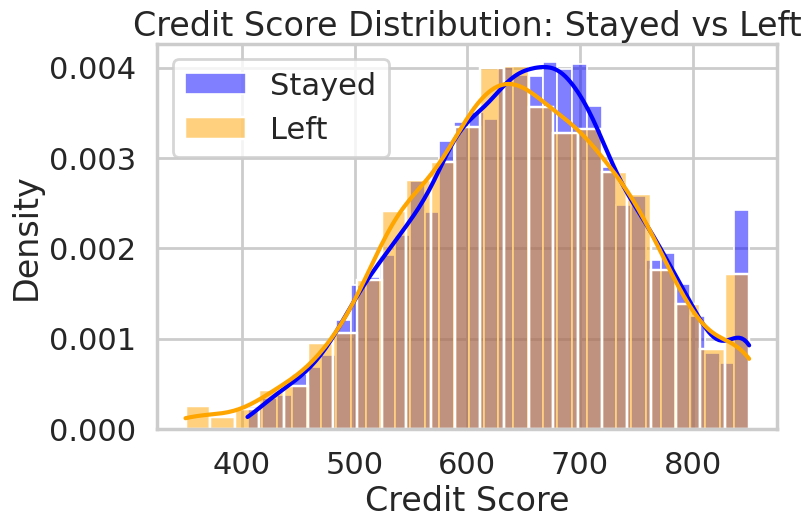

In [20]:
## TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).
sns.histplot(df_0['CreditScore'], color='blue', label='Stayed', kde=True, stat='density')

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ —É—à–ª–∏
sns.histplot(df_1['CreditScore'], color='orange', label='Left', kde=True, stat='density')

plt.title('Credit Score Distribution: Stayed vs Left')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In [21]:
## TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).
from scipy.stats import ttest_ind

# –°—Ä–µ–¥–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç–Ω—ã–µ —Ä–µ–π—Ç–∏–Ω–≥–∏
mean_credit_stayed = df_0['CreditScore'].mean()
mean_credit_left = df_1['CreditScore'].mean()

print(f"–°—Ä–µ–¥–Ω–∏–π Credit Score (–æ—Å—Ç–∞–ª–∏—Å—å): {mean_credit_stayed:.2f}")
print(f"–°—Ä–µ–¥–Ω–∏–π Credit Score (—É—à–ª–∏): {mean_credit_left:.2f}")

# t-—Ç–µ—Å—Ç —Å –Ω–µ—Ä–∞–≤–Ω—ã–º–∏ –¥–∏—Å–ø–µ—Ä—Å–∏—è–º–∏ (Welch‚Äôs t-test)
t_stat_cs, p_value_cs = ttest_ind(df_0['CreditScore'], df_1['CreditScore'], equal_var=False)

print(f"T-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {t_stat_cs:.4f}")
print(f"P-–∑–Ω–∞—á–µ–Ω–∏–µ: {p_value_cs:.4f}")

if p_value_cs < 0.05:
    print("–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –≤ –∫—Ä–µ–¥–∏—Ç–Ω—ã—Ö —Ä–µ–π—Ç–∏–Ω–≥–∞—Ö –∑–Ω–∞—á–∏–º–∞ –Ω–∞ —É—Ä–æ–≤–Ω–µ 5%.")
else:
    print("–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –≤ –∫—Ä–µ–¥–∏—Ç–Ω—ã—Ö —Ä–µ–π—Ç–∏–Ω–≥–∞—Ö –ù–ï –∑–Ω–∞—á–∏–º–∞ –Ω–∞ —É—Ä–æ–≤–Ω–µ 5%.")



–°—Ä–µ–¥–Ω–∏–π Credit Score (–æ—Å—Ç–∞–ª–∏—Å—å): 651.85
–°—Ä–µ–¥–Ω–∏–π Credit Score (—É—à–ª–∏): 645.35
T-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 2.6347
P-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.0085
–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –≤ –∫—Ä–µ–¥–∏—Ç–Ω—ã—Ö —Ä–µ–π—Ç–∏–Ω–≥–∞—Ö –∑–Ω–∞—á–∏–º–∞ –Ω–∞ —É—Ä–æ–≤–Ω–µ 5%.


### Conclusion
Do we reject the Null Hypothesis ? Why ?
yes. The p-value and small but consistent difference support the idea that this feature should be included in the analysis and model.

## Hypothesis 3: Balance

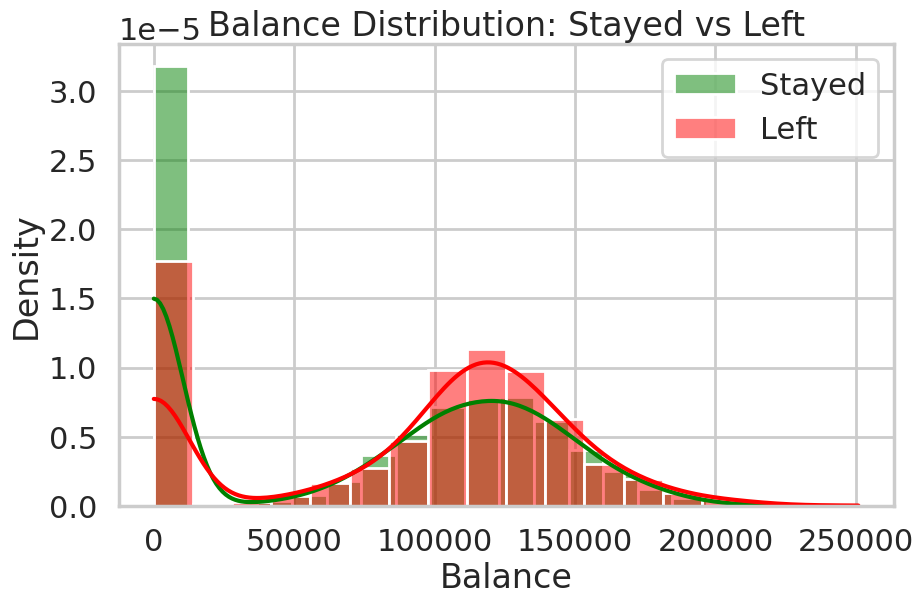

In [22]:
## TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).
plt.figure(figsize=(10, 6))

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –±–∞–ª–∞–Ω—Å–∞ –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –æ—Å—Ç–∞–ª–∏—Å—å
sns.histplot(df_0['Balance'], color='green', label='Stayed', kde=True, stat='density')

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –±–∞–ª–∞–Ω—Å–∞ –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ —É—à–ª–∏
sns.histplot(df_1['Balance'], color='red', label='Left', kde=True, stat='density')

plt.title('Balance Distribution: Stayed vs Left')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.show()


In [23]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left.
# –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è
mean_balance_stayed = df_0['Balance'].mean()
mean_balance_left = df_1['Balance'].mean()

print(f"–°—Ä–µ–¥–Ω–∏–π Balance (–æ—Å—Ç–∞–ª–∏—Å—å): {mean_balance_stayed:.2f}")
print(f"–°—Ä–µ–¥–Ω–∏–π Balance (—É—à–ª–∏): {mean_balance_left:.2f}")

# t-—Ç–µ—Å—Ç –¥–ª—è –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö
from scipy.stats import ttest_ind

t_stat_bal, p_value_bal = ttest_ind(df_0['Balance'], df_1['Balance'], equal_var=False)

print(f"T-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {t_stat_bal:.4f}")
print(f"P-–∑–Ω–∞—á–µ–Ω–∏–µ: {p_value_bal:.4f}")

if p_value_bal < 0.05:
    print("–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –≤ Balance –∑–Ω–∞—á–∏–º–∞ (—Å –Ω—É–ª–µ–≤—ã–º–∏ –±–∞–ª–∞–Ω—Å–∞–º–∏).")
else:
    print("–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –≤ Balance –ù–ï –∑–Ω–∞—á–∏–º–∞ (—Å –Ω—É–ª–µ–≤—ã–º–∏ –±–∞–ª–∞–Ω—Å–∞–º–∏).")


–°—Ä–µ–¥–Ω–∏–π Balance (–æ—Å—Ç–∞–ª–∏—Å—å): 72745.30
–°—Ä–µ–¥–Ω–∏–π Balance (—É—à–ª–∏): 91108.54
T-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: -12.4713
P-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.0000
–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –≤ Balance –∑–Ω–∞—á–∏–º–∞ (—Å –Ω—É–ª–µ–≤—ã–º–∏ –±–∞–ª–∞–Ω—Å–∞–º–∏).


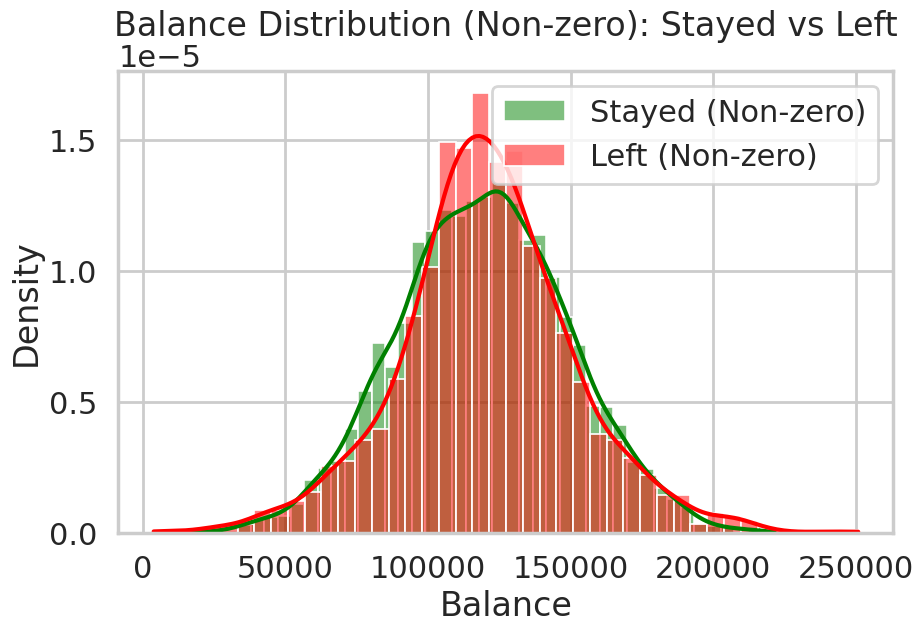

In [24]:
## TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.
# –§–∏–ª—å—Ç—Ä—É–µ–º —Ç–æ–ª—å–∫–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –Ω–µ–Ω—É–ª–µ–≤—ã–º –±–∞–ª–∞–Ω—Å–æ–º
df_0_nonzero = df_0[df_0['Balance'] > 0]
df_1_nonzero = df_1[df_1['Balance'] > 0]

plt.figure(figsize=(10, 6))

sns.histplot(df_0_nonzero['Balance'], color='green', label='Stayed (Non-zero)', kde=True, stat='density')
sns.histplot(df_1_nonzero['Balance'], color='red', label='Left (Non-zero)', kde=True, stat='density')

plt.title('Balance Distribution (Non-zero): Stayed vs Left')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.show()


In [25]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.
# –ù–æ–≤—ã–µ —Å—Ä–µ–¥–Ω–∏–µ –¥–ª—è –Ω–µ–Ω—É–ª–µ–≤—ã—Ö
mean_balance_stayed_nz = df_0_nonzero['Balance'].mean()
mean_balance_left_nz = df_1_nonzero['Balance'].mean()

print(f"–°—Ä–µ–¥–Ω–∏–π Balance (–æ—Å—Ç–∞–ª–∏—Å—å, >0): {mean_balance_stayed_nz:.2f}")
print(f"–°—Ä–µ–¥–Ω–∏–π Balance (—É—à–ª–∏, >0): {mean_balance_left_nz:.2f}")

# t-—Ç–µ—Å—Ç –¥–ª—è –Ω–µ–Ω—É–ª–µ–≤—ã—Ö
t_stat_bal_nz, p_value_bal_nz = ttest_ind(df_0_nonzero['Balance'], df_1_nonzero['Balance'], equal_var=False)

print(f"T-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ (–±–µ–∑ –Ω—É–ª–µ–≤—ã—Ö): {t_stat_bal_nz:.4f}")
print(f"P-–∑–Ω–∞—á–µ–Ω–∏–µ (–±–µ–∑ –Ω—É–ª–µ–≤—ã—Ö): {p_value_bal_nz:.4f}")

if p_value_bal_nz < 0.05:
    print("–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –≤ Balance –∑–Ω–∞—á–∏–º–∞ (–±–µ–∑ –Ω—É–ª–µ–≤—ã—Ö).")
else:
    print("–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –≤ Balance –ù–ï –∑–Ω–∞—á–∏–º–∞ (–±–µ–∑ –Ω—É–ª–µ–≤—ã—Ö).")


–°—Ä–µ–¥–Ω–∏–π Balance (–æ—Å—Ç–∞–ª–∏—Å—å, >0): 119535.86
–°—Ä–µ–¥–Ω–∏–π Balance (—É—à–ª–∏, >0): 120746.97
T-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ (–±–µ–∑ –Ω—É–ª–µ–≤—ã—Ö): -1.3605
P-–∑–Ω–∞—á–µ–Ω–∏–µ (–±–µ–∑ –Ω—É–ª–µ–≤—ã—Ö): 0.1738
–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –≤ Balance –ù–ï –∑–Ω–∞—á–∏–º–∞ (–±–µ–∑ –Ω—É–ª–µ–≤—ã—Ö).


## Conclusion

Do we reject the Null Hypothesis ? Why ?
No.the difference in average balances between those who left and those who remained is not significant. P-–∑–Ω–∞—á–µ–Ω–∏–µ (–±–µ–∑ –Ω—É–ª–µ–≤—ã—Ö): 0.1738

## Hypothesis 4: Estimated Salary

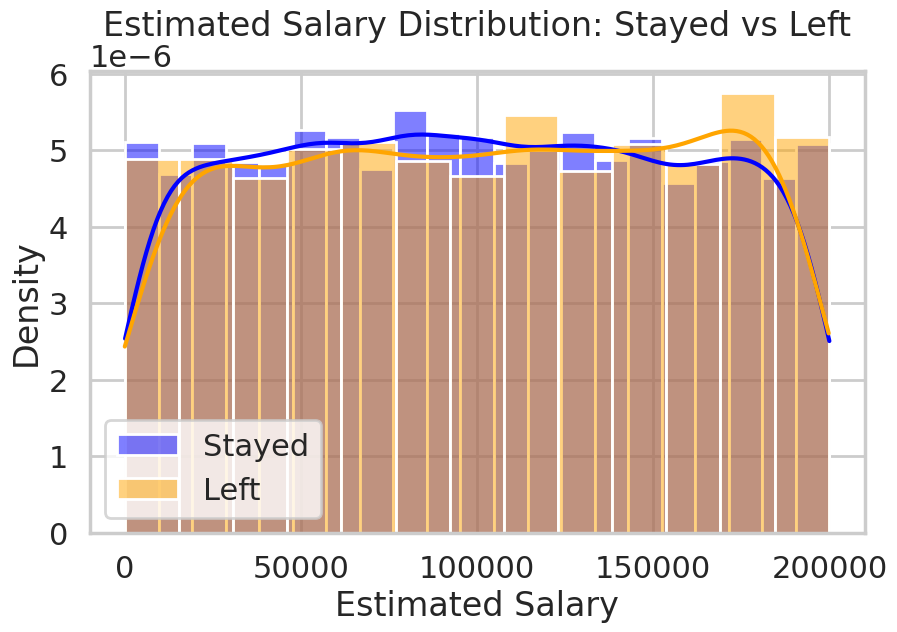

In [26]:
## TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.
plt.figure(figsize=(10, 6))

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –¥–ª—è —Ç–µ—Ö, –∫—Ç–æ –æ—Å—Ç–∞–ª—Å—è
sns.histplot(df_0['EstimatedSalary'], color='blue', label='Stayed', kde=True, stat='density')

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –¥–ª—è —Ç–µ—Ö, –∫—Ç–æ —É—à—ë–ª
sns.histplot(df_1['EstimatedSalary'], color='orange', label='Left', kde=True, stat='density')

plt.title('Estimated Salary Distribution: Stayed vs Left')
plt.xlabel('Estimated Salary')
plt.ylabel('Density')
plt.legend()
plt.show()

In [27]:
## TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.
from scipy.stats import ttest_ind

# –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞—Ä–ø–ª–∞—Ç—ã
mean_salary_stayed = df_0['EstimatedSalary'].mean()
mean_salary_left = df_1['EstimatedSalary'].mean()

print(f"–°—Ä–µ–¥–Ω–∏–π Estimated Salary (–æ—Å—Ç–∞–ª–∏—Å—å): {mean_salary_stayed:.2f}")
print(f"–°—Ä–µ–¥–Ω–∏–π Estimated Salary (—É—à–ª–∏): {mean_salary_left:.2f}")

# t-—Ç–µ—Å—Ç
t_stat_salary, p_value_salary = ttest_ind(df_0['EstimatedSalary'], df_1['EstimatedSalary'], equal_var=False)

print(f"T-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {t_stat_salary:.4f}")
print(f"P-–∑–Ω–∞—á–µ–Ω–∏–µ: {p_value_salary:.4f}")

if p_value_salary < 0.05:
    print("–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –≤ Estimated Salary –∑–Ω–∞—á–∏–º–∞ ‚Üí –≤–ª–∏—è–µ—Ç.")
else:
    print("–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –≤ Estimated Salary –ù–ï –∑–Ω–∞—á–∏–º–∞ ‚Üí –Ω–µ –≤–ª–∏—è–µ—Ç.")


–°—Ä–µ–¥–Ω–∏–π Estimated Salary (–æ—Å—Ç–∞–ª–∏—Å—å): 99738.39
–°—Ä–µ–¥–Ω–∏–π Estimated Salary (—É—à–ª–∏): 101465.68
T-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: -1.2034
P-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.2289
–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ –≤ Estimated Salary –ù–ï –∑–Ω–∞—á–∏–º–∞ ‚Üí –Ω–µ –≤–ª–∏—è–µ—Ç.


Estimated Salary does NOT affect customer churn (at least not directly and linearly).

### Using Bootstrapping

In [28]:
## TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.
import numpy as np

# –°—Ä–µ–¥–Ω–∏–π –ø–æ –≤—Å–µ–º
mean_salary_all = df['EstimatedSalary'].mean()

# –°–¥–≤–∏–≥–∞–µ–º –∫ –æ–±—â–µ–º—É —Å—Ä–µ–¥–Ω–µ–º—É
salary_stayed_shifted = df_0['EstimatedSalary'] - df_0['EstimatedSalary'].mean() + mean_salary_all
salary_left_shifted = df_1['EstimatedSalary'] - df_1['EstimatedSalary'].mean() + mean_salary_all

# –§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ —Å—Ä–µ–¥–Ω–∏—Ö
obs_diff_salary = df_1['EstimatedSalary'].mean() - df_0['EstimatedSalary'].mean()

print(f"–§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ —Å—Ä–µ–¥–Ω–∏—Ö EstimatedSalary: {obs_diff_salary:.2f}")


–§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ —Å—Ä–µ–¥–Ω–∏—Ö EstimatedSalary: 1727.29


In [29]:
## TODO: Calculate the bootstrap sample means for both groups and their difference.
def bs_choice(data, func, size):
    bs_s = np.empty(size)
    n = len(data)
    for i in range(size):
        bs_sample = np.random.choice(data, size=n, replace=True)
        bs_s[i] = func(bs_sample)
    return bs_s

# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –±—É—Ç—Å—Ç—Ä—ç–ø–ø–æ–≤
n_bootstrap = 10000

# –ë—É—Ç—Å—Ç—Ä—ç–ø –¥–ª—è —Å–¥–≤–∏–Ω—É—Ç—ã—Ö –¥–∞–Ω–Ω—ã—Ö
bs_salary_stayed = bs_choice(salary_stayed_shifted, np.mean, n_bootstrap)
bs_salary_left = bs_choice(salary_left_shifted, np.mean, n_bootstrap)

# –†–∞–∑–Ω–∏—Ü–∞
bs_diff_salary = bs_salary_left - bs_salary_stayed

# –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ
std_bs_diff_salary = np.std(bs_diff_salary)

print(f"–ë—É—Ç—Å—Ç—Ä—ç–ø-STD —Ä–∞–∑–Ω–∏—Ü—ã EstimatedSalary: {std_bs_diff_salary:.2f}")


–ë—É—Ç—Å—Ç—Ä—ç–ø-STD —Ä–∞–∑–Ω–∏—Ü—ã EstimatedSalary: 1456.23


In [30]:
## TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.
# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–æ–π —Ä–∞–∑–Ω–∏—Ü—ã —Å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º
p_value_bs_salary = np.sum(np.abs(bs_diff_salary) >= np.abs(obs_diff_salary)) / n_bootstrap

print(f"P-value –±—É—Ç—Å—Ç—Ä—ç–ø–ø–∏–Ω–≥: {p_value_bs_salary:.4f}")

if p_value_bs_salary < 0.05:
    print("–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ EstimatedSalary –∑–Ω–∞—á–∏–º–∞ (–±—É—Ç—Å—Ç—Ä—ç–ø).")
else:
    print("–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ EstimatedSalary –ù–ï –∑–Ω–∞—á–∏–º–∞ (–±—É—Ç—Å—Ç—Ä—ç–ø).")


P-value –±—É—Ç—Å—Ç—Ä—ç–ø–ø–∏–Ω–≥: 0.2359
–ó–∞–∫–ª—é—á–µ–Ω–∏–µ: –†–∞–∑–Ω–∏—Ü–∞ EstimatedSalary –ù–ï –∑–Ω–∞—á–∏–º–∞ (–±—É—Ç—Å—Ç—Ä—ç–ø).


### Conclusion
Do we reject the Null Hypothesis ? Why ?
P-value bootstrapping: 0.2359
üëâ This is much greater than 0.05.

This means: even if you repeatedly randomly re-draw samples with replacement, the difference in average salary remains a random fluctuation, not a significant relationship.

Conclusion: The null hypothesis is NOT rejected. Salary does not affect customer churn.

## Final Conclusion
What will be the most helpful feature in predicting churning?
‚úÖ Summary of Analysis

Influential factors: Age and credit score (p-value < 0.05)

Not directly influential: Account balance and income level

üîë What this means

Older customers and those with lower credit scores are more likely to churn.

Simply having money in the account or a high salary does not retain customers.

The key factor is customer activity and engagement.

üìå Recommended actions

Launch targeted retention programs for specific age groups and customers with low credit scores.

Offer special products, personalized support, and incentives.

Encourage frequent use of services and cross-selling.

Main conclusion:
üëâ Retention = service and engagement, not just money in the account.
